# Importing the dependencies

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.preprocessing import LabelEncoder



import nltk
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Loading the Data

In [ ]:

data = pd.read_csv('text_language.csv', header = None)
data.columns = ['Text', 'Language']
data = data[1:]

In [39]:
data['Language'].value_counts()


Language
Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: count, dtype: int64

# Preprocessing the text

In [ ]:
def preprocess_text(text):
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text) 
    
    text = text.lower()

    text = ' '.join(text.split())

    return text

data['Text'] = data['Text'].apply(preprocess_text)

In [ ]:
X = data["Text"]
y = data["Language"]

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

# Feature Extraction

In [ ]:

vectorizer = TfidfVectorizer(max_features=30000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [14]:
X_train_tfidf.shape

(17600, 30000)

In [ ]:
model = MultinomialNB()

# Train the model
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [ ]:

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.9340909090909091
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       0.88      0.45      0.60       185
           2       0.95      0.98      0.97       198
           3       0.71      1.00      0.83       216
           4       0.52      0.96      0.68       168
           5       0.94      1.00      0.97       219
           6       1.00      0.99      0.99       195
           7       1.00      0.99      0.99       220
           8       1.00      0.44      0.61       193
           9       1.00      0.99      1.00       213
          10       0.97      0.91      0.94       195
          11       1.00      1.00      1.00       225
          12       1.00      0.95      0.97       217
          13       1.00      0.95      0.97       204
          14       1.00      0.97      0.98       223
          15       0.99      0.99      0.99       187
          16       0.99      

In [20]:
confusion_m = confusion_matrix(y_test, y_pred)

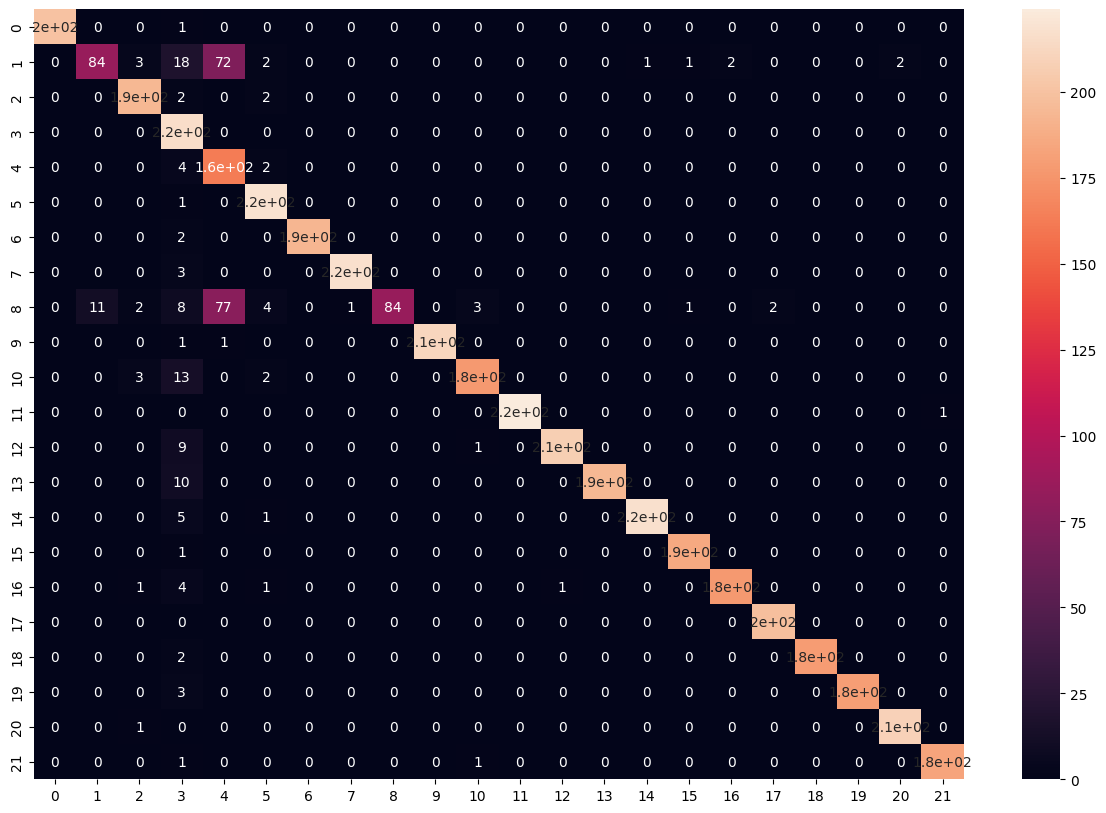

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_m, annot = True)
plt.show()

In [28]:
def lang_predict(text):
     x = vectorizer.transform([text]).toarray() 
     lang = model.predict(x)
     lang = le.inverse_transform(lang) 
     print("The langauge is in",lang[0]) 

In [30]:
lang_predict("Today is going to be very busy because I have a lot of things to do.")

The langauge is in English


In [31]:
lang_predict("سيكون اليوم مشغولاً للغاية لأن لدي الكثير من الأشياء لأفعلها.")

The langauge is in Arabic


In [32]:
lang_predict("आज का दिन बहुत व्यस्त रहने वाला है क्योंकि मेरे पास करने के लिए बहुत कुछ है।")

The langauge is in Hindi


In [43]:
lang_predict("நீங்கள் வரவேற்கப்படுகிறீர்கள்.")

The langauge is in Tamil
